In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  ##for ploting the data on world map

In [2]:
path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df=pd.read_csv(path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3008 non-null   float64
 1   Admin2          3011 non-null   object 
 2   Province_State  3255 non-null   object 
 3   Country_Region  3436 non-null   object 
 4   Last_Update     3436 non-null   object 
 5   Lat             3365 non-null   float64
 6   Long_           3365 non-null   float64
 7   Confirmed       3436 non-null   int64  
 8   Deaths          3436 non-null   int64  
 9   Recovered       3436 non-null   int64  
 10  Active          3436 non-null   int64  
 11  Combined_Key    3436 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 322.2+ KB


In [3]:
df


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3431,NaN,NaN,W.P. Kuala Lumpur,Malaysia,2020-05-26 02:32:35,3.139000,101.686900,1803,17,1292,494,"W.P. Kuala Lumpur, Malaysia"
3432,NaN,NaN,W.P. Labuan,Malaysia,2020-05-26 02:32:35,5.283100,115.230800,16,0,16,0,"W.P. Labuan, Malaysia"
3433,NaN,NaN,W.P. Putrajaya,Malaysia,2020-05-26 02:32:35,2.926400,101.696400,93,1,83,9,"W.P. Putrajaya, Malaysia"
3434,NaN,NaN,Unknown,Malaysia,2020-05-26 02:32:35,NaN,NaN,0,0,0,0,"Unknown, Malaysia"


# DATA_PREPROCESSING 

In [4]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)


In [5]:
df.rename(columns={'Country_Region': "Country"}, inplace=True)

In [6]:
df

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8
...,...,...,...,...,...,...,...
3431,Malaysia,3.139000,101.686900,1803,17,1292,494
3432,Malaysia,5.283100,115.230800,16,0,16,0
3433,Malaysia,2.926400,101.696400,93,1,83,9
3434,Malaysia,NaN,NaN,0,0,0,0


# The data can be grouped together by the ‘groupby’ function of the dataframe. It is similar to the GROUPBY statement in SQL.

In [7]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world

<ipython-input-7-592611755ff9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9860,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4
...,...,...,...,...,...
187,Vietnam,326,54,272,0
188,West Bank and Gaza,423,63,357,3
189,Yemen,233,179,10,44
190,Zambia,920,577,336,7


# Now our data is clean and ready to use

# Finding top 20 countries with maximum no. of confirmed case and generation a BarPlot

C:\Users\ABSAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


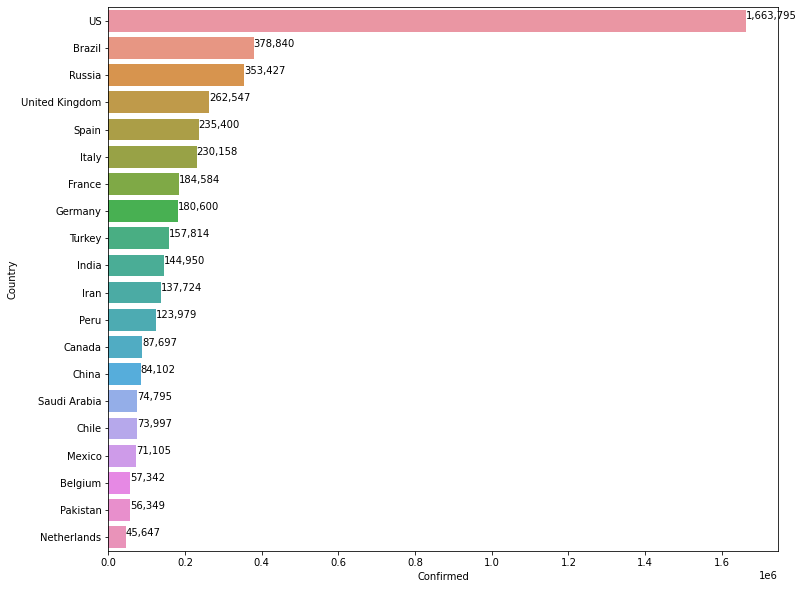

In [8]:
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

# Plotting Confirmed and Active cases for the top 5 countries with the maximum number of confirmed cases and generating BarPlot and adding text to it. 

In [ ]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

# Plotting a Choropleth map on World Map

In [ ]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()